In [781]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import toolbox_ML as tb

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

## Descripción breve del proyecto:
El proyecto consiste en construir un modelo de machine learning para predecir si un pedido de e-commerce llegará a tiempo o sufrirá un retraso. Utilizaremos un dataset que contiene variables sobre logística, atención al cliente, características del producto y condiciones de envío. La variable objetivo (target) es Reached.on.Time_Y.N, donde 1 indica entrega a tiempo y 0 indica retraso.

El tema de la logística y la entrega de productos es clave en el mundo actual del e-commerce, donde la experiencia del cliente y el cumplimiento de los tiempos son determinantes para la fidelización y satisfacción. Este proyecto me permite:

Aplicar todo el ciclo completo de Machine Learning (EDA, preprocesamiento, modelado y evaluación).

Enfrentarme a un caso de clasificación binaria realista y con impacto empresarial.

Explorar cómo variables logísticas (como el método de envío, el peso del paquete o la cantidad de llamadas al servicio al cliente) afectan la puntualidad en las entregas.

Además, este tipo de predicciones podría ayudar a las empresas a anticipar retrasos, ajustar procesos logísticos y mejorar la satisfacción del cliente final.

In [782]:
df_log= pd.read_csv("./data/Train.csv")

In [783]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [784]:
df_log.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


| Nombre del campo                  | Tipo de variable                                                                 |     Descripción |   ||
|-----------------------------------|----------------------------------------------------------------------------|-----------------------|----------------------|-------|
|ID	Numérica (Identificador)	|Identificador único de cada pedido.| No tiene valor predictivo, solo sirve para seguimiento.|
|Warehouse_block	|Categórica nominal|	Bloque o sección del almacén desde donde se despachó el pedido (A, B, C, D, F). No tiene orden jerárquico.|
|Mode_of_Shipment	|Categórica nominal|	Modo de envío utilizado: "Ship", "Flight", o "Road". Describe el medio de transporte.|
|Customer_care_calls|	Numérica discreta|	Número de veces que el cliente ha llamado al servicio de atención para consultar sobre el pedido.|
|Customer_rating	|Categórica ordinal|	Valoración dada por el cliente (1 a 5), donde 1 es muy mala experiencia y 5 es excelente.|
|Cost_of_the_Product	|Numérica continua	|Costo total del producto comprado. Variable monetaria.|
|Prior_purchases	|Numérica discreta|	Número de compras previas hechas por el cliente. Indica historial de compras.|
|Product_importance	|Categórica ordinal	|Nivel de importancia del producto: "low", "medium", "high". Puede influir en la prioridad de envío.|
|Gender	|Categórica binaria	|Género del cliente: "M" (masculino) o "F" (femenino).|
|Discount_offered	|Numérica continua	|Descuento ofrecido al cliente en esa compra (en valor monetario).|
|Weight_in_gms	|Numérica continua	|Peso del paquete en gramos.|
|Reached.on.Time_Y.N	|Binaria (Target)|	Variable objetivo (target). Indica si el pedido llegó a tiempo (1 = Sí, 0 = No).|

In [785]:
precent_missing = df_log.isnull().sum()*100/len(df_log)
missing_value_df = pd.DataFrame({'column_name': df_log.columns,
                                'percent_missing': precent_missing}).sort_values('percent_missing', ascending=False)
missing_value_df

,column_name,percent_missing
ID,ID,0.0
Warehouse_block,Warehouse_block,0.0
Mode_of_Shipment,Mode_of_Shipment,0.0
Customer_care_calls,Customer_care_calls,0.0
Customer_rating,Customer_rating,0.0
Cost_of_the_Product,Cost_of_the_Product,0.0
Prior_purchases,Prior_purchases,0.0
Product_importance,Product_importance,0.0
Gender,Gender,0.0
Discount_offered,Discount_offered,0.0


In [786]:
target = "Reached.on.Time_Y.N"

In [787]:
train_set, test_set = train_test_split(df_log, test_size = 0.2, random_state= 42)

### 1. MiniEDA

*Análisis del target*

In [788]:
train_set["Reached.on.Time_Y.N"].value_counts(normalize=True)

Reached.on.Time_Y.N
1    0.597568
0    0.402432
Name: proportion, dtype: float64

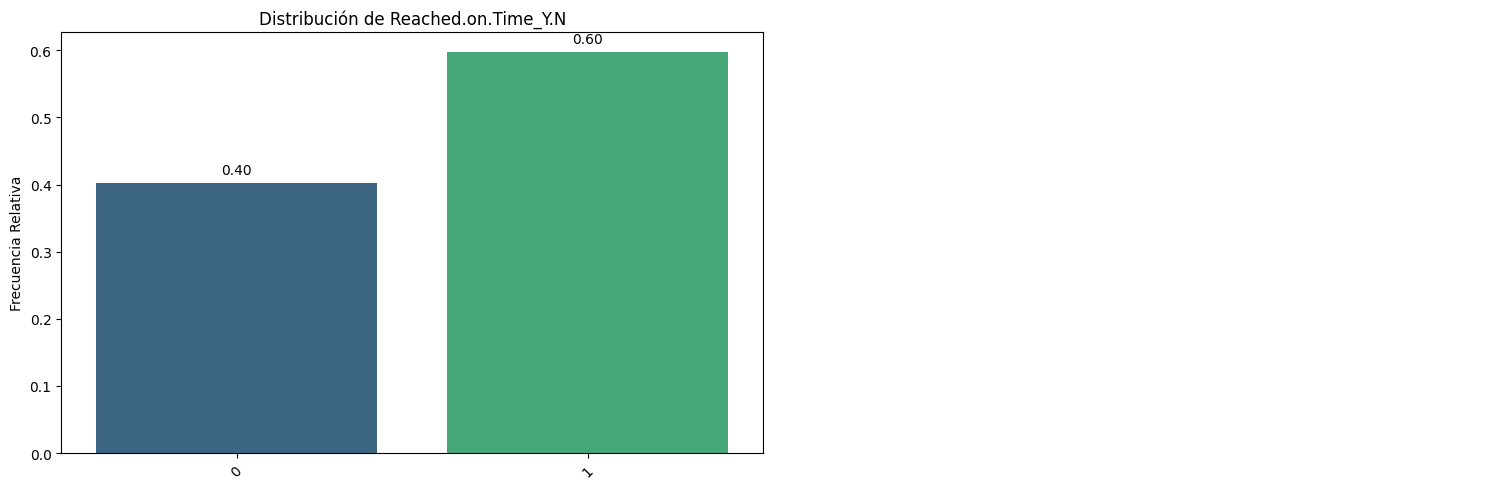

In [789]:
bt.pinta_distribucion_categoricas(train_set, [target], True, True)

La distribución de la variable target muestra un problema real de desempeño logístico, y también nos indica que hay un pequeño desbalance de clases al modelar.

Hay más pedidos que llegaron tarde (casi 60%) que los que llegaron a tiempo (40%).

Esto se considera un desbalance moderado, pero  manejable.

Este desequilibrio puede afectar el desempeño de algunos modelos de clasificación (por ejemplo, modelos pueden tender a predecir más la clase mayoritaria).

Vamos a emplear el recall medio ("balanced_accuracy") en este tipo de desequilibrios es buena elección para su evaluación.

### 2.  Clasificación y transformación de variables

En esta etapa identificaremos cuáles variables son numéricas y cuáles categóricas, ya que el tratamiento, análisis y modelado que aplicaremos a cada tipo será diferente y específico según su naturaleza.

Para este analisis aplicaremos fuciones de nuestros toolbox

Además, evaluaremos si alguna de ellas requiere transformaciones adicionales (como codificación, escalado o discretización), en función de su tipo y su distribución.

In [790]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8799.0,5506.146380,3173.423709,2.0,2743.0,5525.0,8241.5,10999.0
Customer_care_calls,8799.0,4.058757,1.143919,2.0,3.0,4.0,5.0,7.0
Customer_rating,8799.0,2.994431,1.410380,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,8799.0,210.368110,48.304716,96.0,169.0,215.0,251.0,310.0
Prior_purchases,8799.0,3.580521,1.533097,2.0,3.0,3.0,4.0,10.0
Discount_offered,8799.0,13.387317,16.257308,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,8799.0,3624.831799,1635.765060,1001.0,1834.0,4145.0,5037.0,7846.0
Reached.on.Time_Y.N,8799.0,0.597568,0.490416,0.0,0.0,1.0,1.0,1.0


In [791]:
tb.describe_df(train_set).T

,Tipo,% Nulos,Valores infinitos,Valores Únicos,% Cardinalidad
ID,int64,0.00%,No,8799,100.00%
Warehouse_block,object,0.00%,No,5,0.06%
Mode_of_Shipment,object,0.00%,No,3,0.03%
Customer_care_calls,int64,0.00%,No,6,0.07%
Customer_rating,int64,0.00%,No,5,0.06%
Cost_of_the_Product,int64,0.00%,No,215,2.44%
Prior_purchases,int64,0.00%,No,8,0.09%
Product_importance,object,0.00%,No,3,0.03%
Gender,object,0.00%,No,2,0.02%
Discount_offered,int64,0.00%,No,65,0.74%


In [792]:
tb.tipifica_variables(train_set,10,0.2)

,nombre_variable,tipo_sugerido
0,ID,Numerica Continua
1,Warehouse_block,Categórica
2,Mode_of_Shipment,Categórica
3,Customer_care_calls,Categórica
4,Customer_rating,Categórica
5,Cost_of_the_Product,Numerica Discreta
6,Prior_purchases,Categórica
7,Product_importance,Categórica
8,Gender,Binaria
9,Discount_offered,Numerica Discreta


(11, 2)


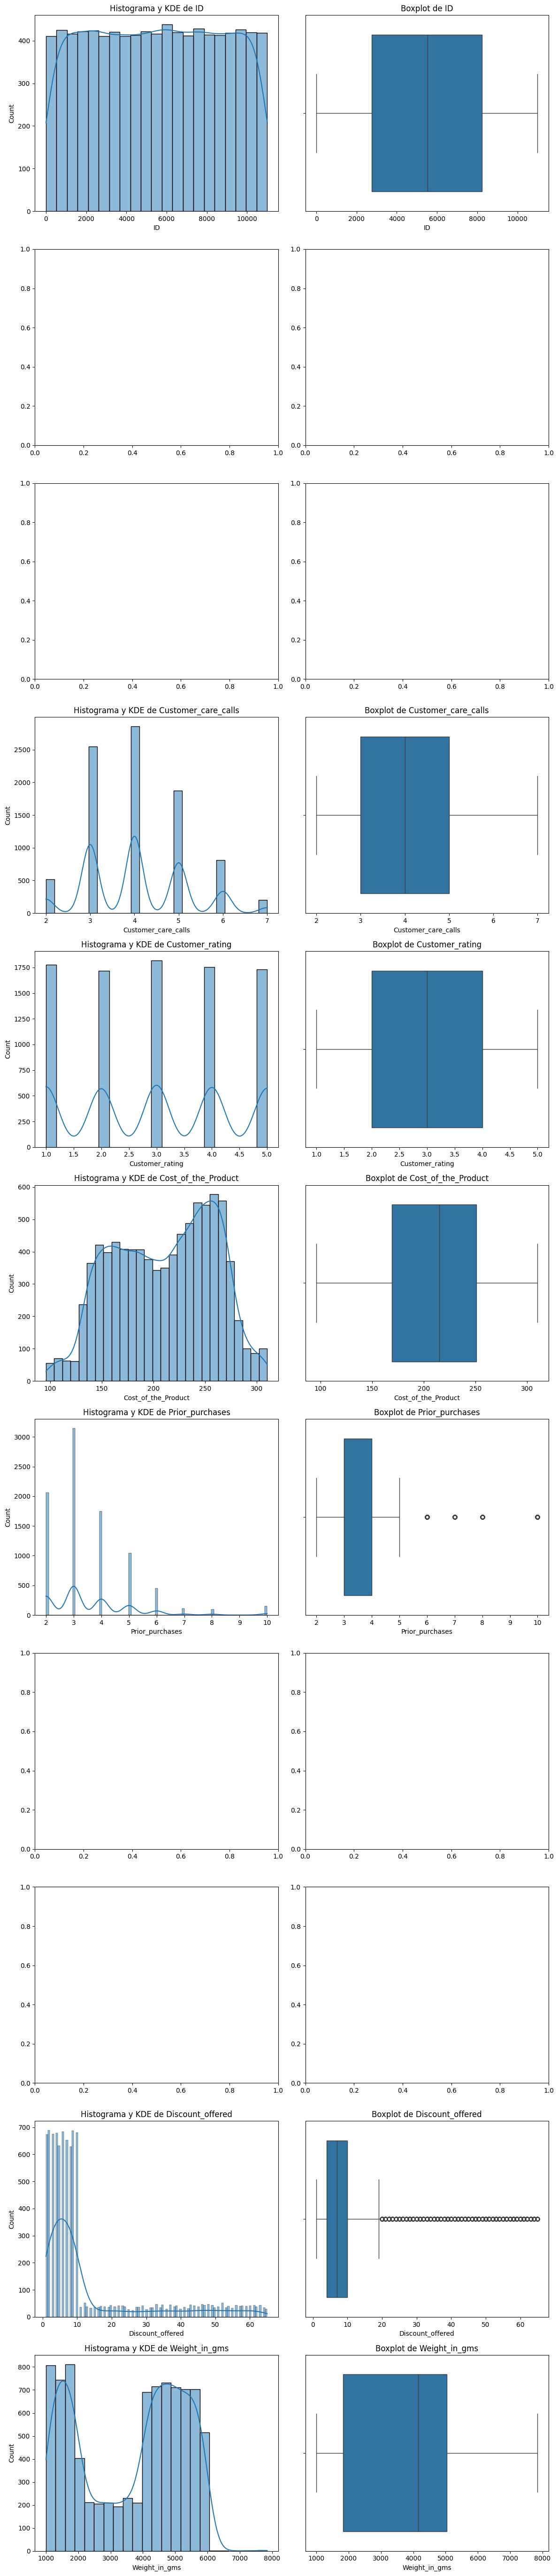

In [793]:
bt.plot_combined_graphs(train_set, [col for col in train_set.columns if col != target])

### Análisis de variables numéricas


* ID:	 *Identificador (No predictiva)*	No debe usarse como feature. Es un identificador único, sin valor predictivo (la eliminamos por su alta cardinalidad)
* Customer_care_calls:	  *Categorica*	Rango bajo (2 a 7 llamadas). Posible discretización o mantenerla tal cual.
* Customer_rating: 	 *Categorica (1 a 5)*	Es una escala de satisfacción. Mantener como ordinal, No escalar.
* Cost_of_the_Product:  	 *Numerica Continua*	Distribución relativamente amplia (96 a 310). Puede requerir escalado si se usan modelos sensibles como KNN o regresión logística.
* Prior_purchases:	  *Categorica*	Valores de 2 a 10. Posible discretización si lo consideras útil (pocos, medianos, muchos).
* Discount_offered: 	 *Numerica Continua*	Hay una gran dispersión (1 a 65). Posible transformación logarítmica o escalado para evitar que domine en el modelo.
* Weight_in_gms:	  *Numerica Continua*	Rango amplio (1001 a 7846 gramos). Recomendable escalar si el modelo lo requiere (ej. KNN o SVM).
* Reached.on.Time_Y.N:	 *Binaria* (Target / Variable objetivo)	0 = Entrega Tarde, 1 = Entrega a Tiempo. Hay un ligero desbalance: ~60% de las entregas llegan a tiempo.

In [794]:
train_set = df_log.drop(["ID"], axis=1)
test_set = df_log.drop(["ID"], axis=1)

In [795]:
train_set

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [796]:
features_num = ["Cost_of_the_Product","Discount_offered","Weight_in_gms"]

In [797]:
features_num

['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

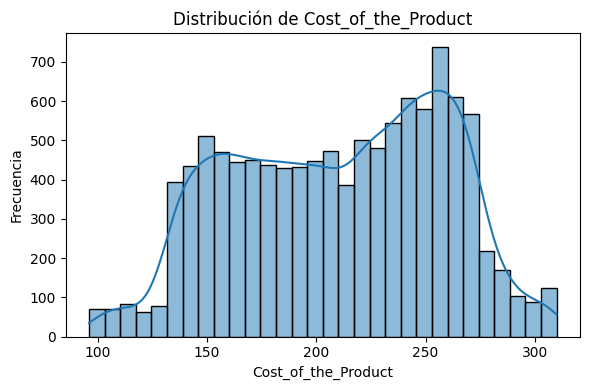

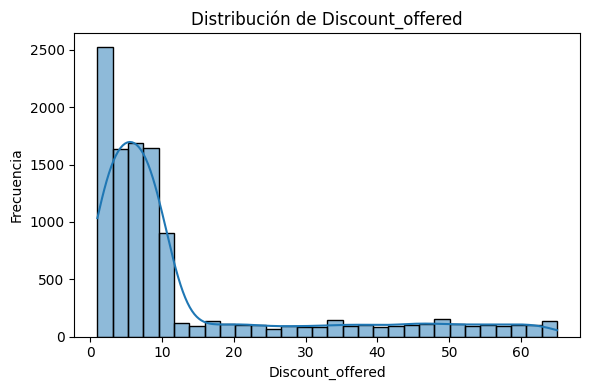

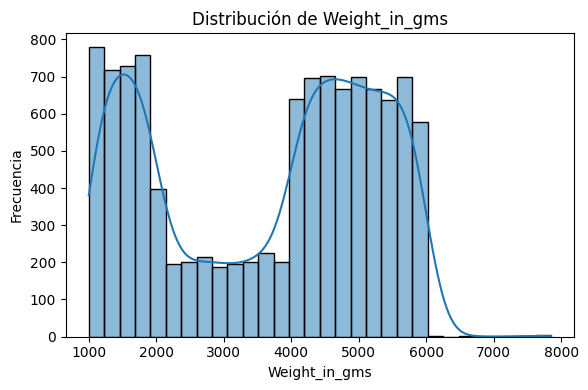

In [798]:
for col in features_num:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_set[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

### Tratamiento de variables categoricas

In [799]:
train_set["Warehouse_block"].value_counts()

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

In [800]:
train_set[train_set[target] == 0]["Warehouse_block"].value_counts(True)

Warehouse_block
F    0.331830
A    0.170875
C    0.166592
D    0.166366
B    0.164337
Name: proportion, dtype: float64

In [801]:
train_set[train_set[target] == 1]["Warehouse_block"].value_counts(True)

Warehouse_block
F    0.334298
B    0.168216
D    0.166997
C    0.166692
A    0.163797
Name: proportion, dtype: float64

In [802]:
train_set = pd.get_dummies(train_set, columns=["Warehouse_block"], prefix="warehouse",drop_first=True)
test_set = pd.get_dummies(test_set, columns=["Warehouse_block"], prefix="warehouse",drop_first=True)

In [803]:
dummy_cols = [col for col in train_set.columns if col.startswith('warehouse_')]
train_set[dummy_cols] = train_set[dummy_cols].astype(int)

In [804]:
dummy_cols = [col for col in test_set.columns if col.startswith('warehouse_')]
test_set[dummy_cols] = test_set[dummy_cols].astype(int)

In [805]:
train_set

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,warehouse_B,warehouse_C,warehouse_D,warehouse_F
0,Flight,4,2,177,3,low,F,44,1233,1,0,0,1,0
1,Flight,4,5,216,2,low,M,59,3088,1,0,0,0,1
2,Flight,2,2,183,4,low,M,48,3374,1,0,0,0,0
3,Flight,3,3,176,4,medium,M,10,1177,1,1,0,0,0
4,Flight,2,2,184,3,medium,F,46,2484,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,Ship,4,1,252,5,medium,F,1,1538,1,0,0,0,0
10995,Ship,4,1,232,5,medium,F,6,1247,0,1,0,0,0
10996,Ship,5,4,242,5,low,F,4,1155,0,0,1,0,0
10997,Ship,5,2,223,6,medium,M,2,1210,0,0,0,0,1


"Se aplicó One-Hot Encoding a la variable Warehouse_block tanto en el conjunto de entrenamiento como en el de prueba, utilizando la opción drop_first=True para evitar problemas de multicolinealidad. Además, se garantizó que ambos conjuntos tengan la misma estructura de columnas para una correcta evaluación del modelo."

In [806]:
train_set["Mode_of_Shipment"].value_counts()

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

In [807]:
train_set = pd.get_dummies(train_set, columns=["Mode_of_Shipment"], prefix="shipment",drop_first=True)
test_set = pd.get_dummies(test_set, columns=["Mode_of_Shipment"], prefix="shipment",drop_first=True)

In [808]:
dummy_cols = [col for col in train_set.columns if col.startswith('shipment')]
train_set[dummy_cols] = train_set[dummy_cols].astype(int)

dummy_cols = [col for col in test_set.columns if col.startswith('shipment')]
test_set[dummy_cols] = test_set[dummy_cols].astype(int)

No tiene ningún orden lógico (que un envío sea por "Ship", "Flight" o "Road" no implica un valor mayor o menor).
"Se aplicó One-Hot Encoding a la variable Mode_of_Shipment debido a que es una variable categórica nominal sin un orden jerárquico. Esto permite que el modelo evalúe de manera independiente el efecto de cada tipo de envío sin inducir un orden artificial entre ellos."

"Se aplicó One-Hot Encoding a la variable Warehouse_block, utilizando el parámetro drop_first=True para eliminar una categoría y evitar multicolinealidad. Además, se garantizó que ambas particiones (train y test) tengan la misma estructura de columnas para permitir una correcta evaluación del modelo."

"La opción más adecuada es aplicar One-Hot Encoding, generando N-1 columnas para evitar multicolinealidad, ya que se trata de una variable categórica sin orden jerárquico."

In [809]:
train_set

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,warehouse_B,warehouse_C,warehouse_D,warehouse_F,shipment_Road,shipment_Ship
0,4,2,177,3,low,F,44,1233,1,0,0,1,0,0,0
1,4,5,216,2,low,M,59,3088,1,0,0,0,1,0,0
2,2,2,183,4,low,M,48,3374,1,0,0,0,0,0,0
3,3,3,176,4,medium,M,10,1177,1,1,0,0,0,0,0
4,2,2,184,3,medium,F,46,2484,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,medium,F,1,1538,1,0,0,0,0,0,1
10995,4,1,232,5,medium,F,6,1247,0,1,0,0,0,0,1
10996,5,4,242,5,low,F,4,1155,0,0,1,0,0,0,1
10997,5,2,223,6,medium,M,2,1210,0,0,0,0,1,0,1


In [810]:
train_set["Product_importance"].value_counts()

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

In [811]:
# importance {'low': 1, 'medium': 2, 'high': 3}

train_set['Product_importance'] = train_set['Product_importance'].map({'high': 1, 'medium': 2, 'low': 3})
test_set['Product_importance'] = test_set['Product_importance'].map({'high': 1, 'medium': 2, 'low': 3})

##### La variable Product_importance fue codificada de manera ordinal asignando valores numéricos de la siguiente forma: low = 1, medium = 2, high = 3. Esta transformación se realizó porque existe una relación jerárquica lógica entre las categorías, donde un mayor valor numérico refleja una mayor importancia del producto. Esto permitirá al modelo interpretar adecuadamente el efecto creciente de la importancia del producto sobre la variable objetivo."

In [812]:
train_set["Gender"].value_counts()

Gender
F    5545
M    5454
Name: count, dtype: int64

In [813]:
# Gender {'F': 0, 'M': 1}

train_set['Gender'] = train_set['Gender'].map({'F': 0, 'M': 1})
test_set['Gender'] = test_set['Gender'].map({'F': 0, 'M': 1})

##### "La variable Gender, al ser una variable categórica binaria, fue codificada de manera directa asignando 0 para mujeres (F) y 1 para hombres (M). Esta codificación binaria es eficiente y adecuada para el tipo de modelos utilizados."

In [814]:
train_set

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,warehouse_B,warehouse_C,warehouse_D,warehouse_F,shipment_Road,shipment_Ship
0,4,2,177,3,3,0,44,1233,1,0,0,1,0,0,0
1,4,5,216,2,3,1,59,3088,1,0,0,0,1,0,0
2,2,2,183,4,3,1,48,3374,1,0,0,0,0,0,0
3,3,3,176,4,2,1,10,1177,1,1,0,0,0,0,0
4,2,2,184,3,2,0,46,2484,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,2,0,1,1538,1,0,0,0,0,0,1
10995,4,1,232,5,2,0,6,1247,0,1,0,0,0,0,1
10996,5,4,242,5,3,0,4,1155,0,0,1,0,0,0,1
10997,5,2,223,6,2,1,2,1210,0,0,0,0,1,0,1


## Escalamos variables numericas

"Vamos a escalar de las variables numéricas continuas para evitar que las diferencias de magnitud entre ellas afecten negativamente el rendimiento del modelo. Esto es especialmente importante los modelos seleccionados que sean sensible a la escala de las variables."

Si usamos modelos como:

LogisticRegression

KNN

SVM

MLPClassifier

                   *Sí debemos escalar.*


Si usamos :

RandomForestClassifier

XGBoostClassifier

LGBMClassifier

                  *No es necesario, puedes dejar los valores en su escala original.*

In [815]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 2. Ajustar solo con el train_set
scaler.fit(train_set[features_num])

#3. Transformar ambas (train y test) SOLO en esas columnas
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

train_set_scaled[features_num] = scaler.transform(train_set[features_num])
test_set_scaled[features_num] = scaler.transform(test_set[features_num])

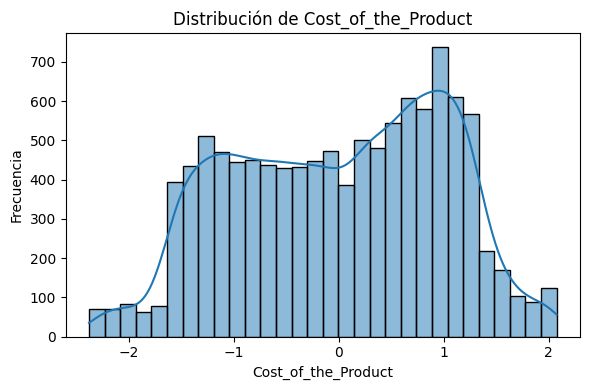

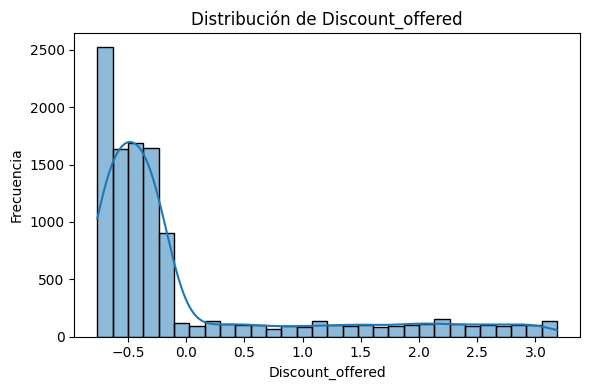

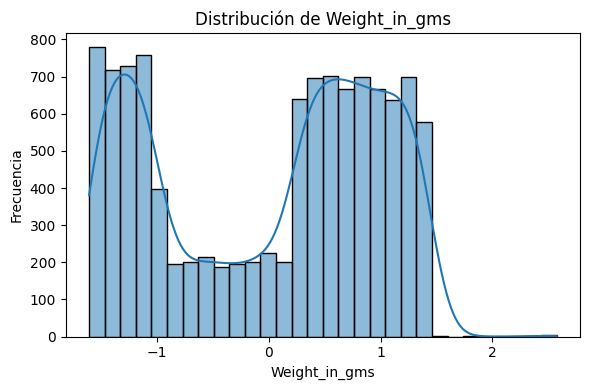

In [816]:
for col in features_num:
     plt.figure(figsize=(6, 4))
     sns.histplot(train_set_scaled[col], kde=True, bins=30)
     plt.title(f'Distribución de {col}')
     plt.xlabel(col)
     plt.ylabel('Frecuencia')
     plt.tight_layout()
     plt.show()

In [817]:
features_num

['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

In [822]:
features_cat = ("Customer_care_calls","Customer_rating","Prior_purchases","Product_importance","Gender",
            "warehouse_B","warehouse_C","warehouse_D","warehouse_F","shipment_Road","shipment_Ship" )

In [823]:
features_cat

('Customer_care_calls',
 'Customer_rating',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'warehouse_B',
 'warehouse_C',
 'warehouse_D',
 'warehouse_F',
 'shipment_Road',
 'shipment_Ship')

In [824]:
target

'Reached.on.Time_Y.N'

## Analisis bivariante

A continuación, realizaremos un análisis bivariante entre cada conjunto de features y la variable target para explorar posibles relaciones y detectar patrones que nos ayuden a entender mejor el comportamiento de las entregas a tiempo.

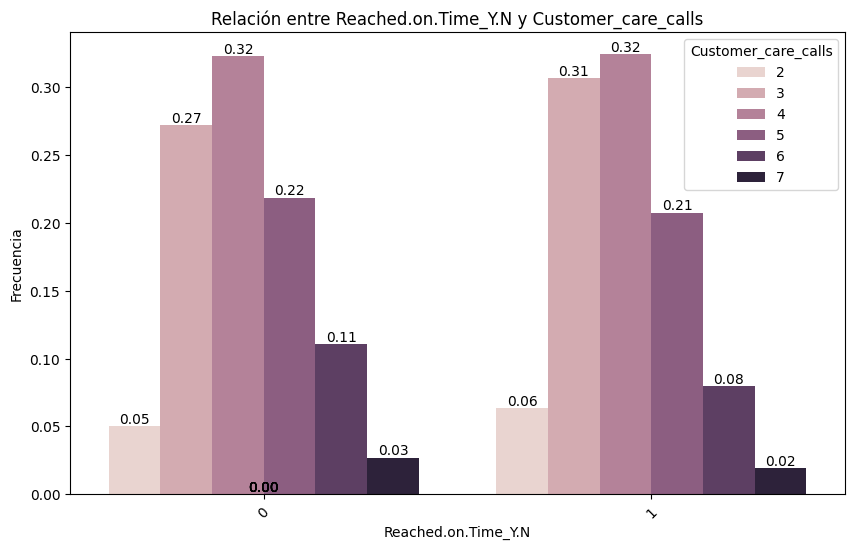

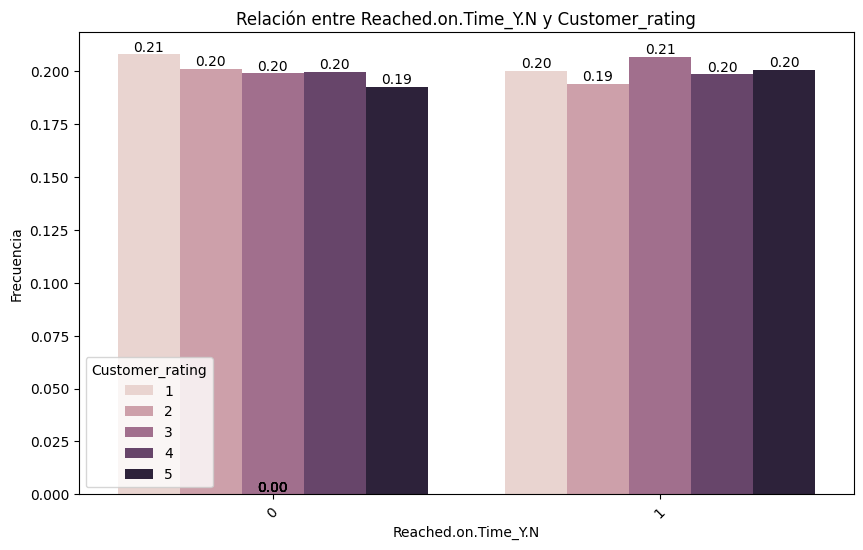

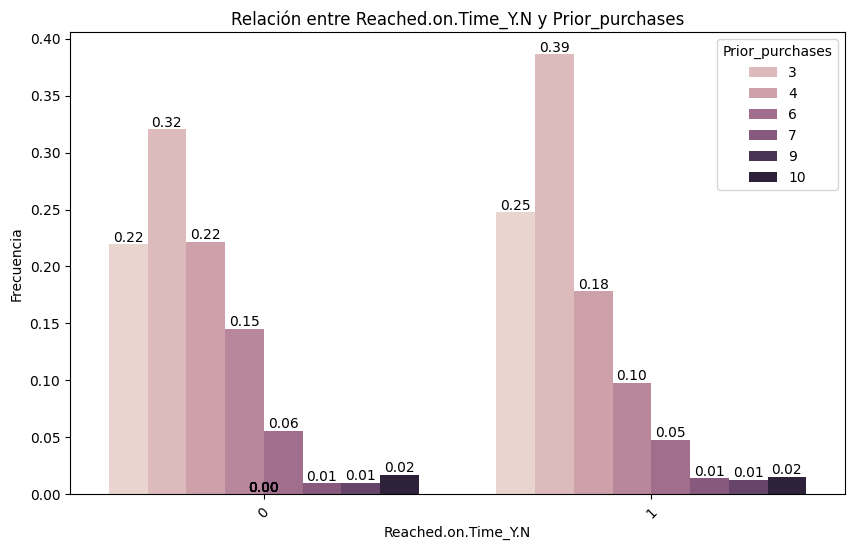

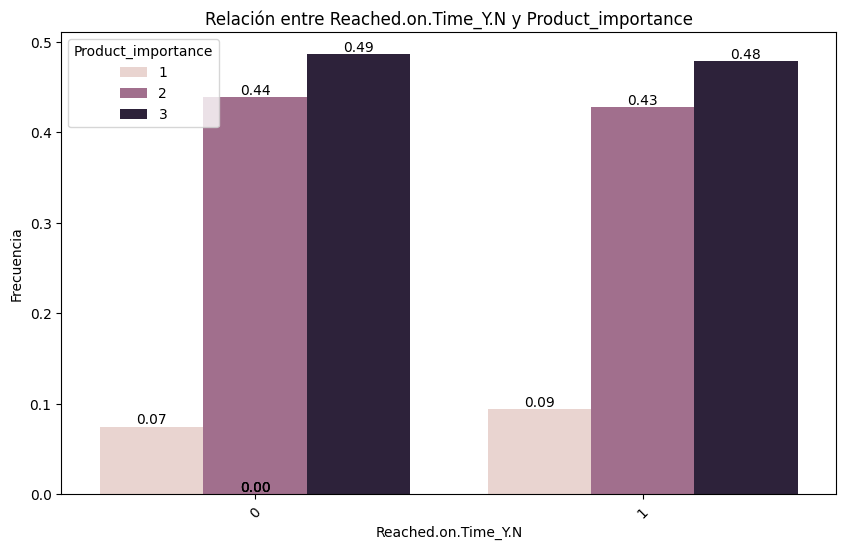

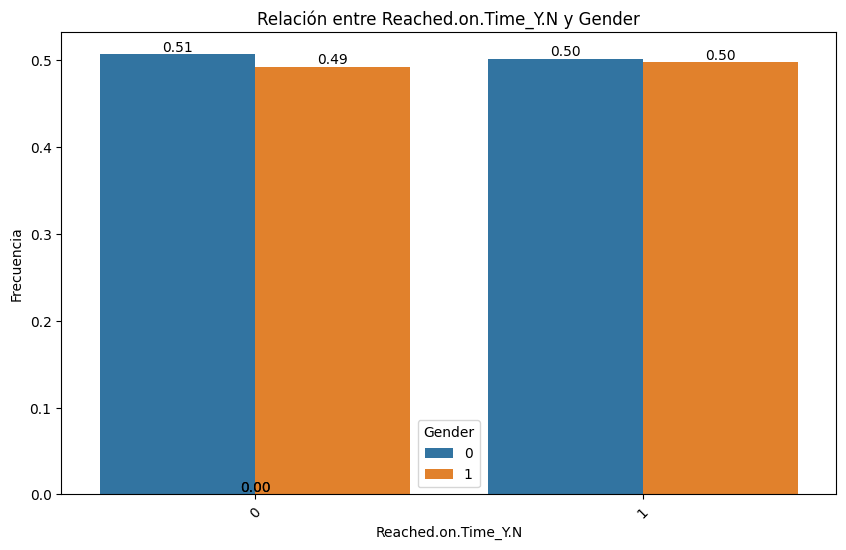

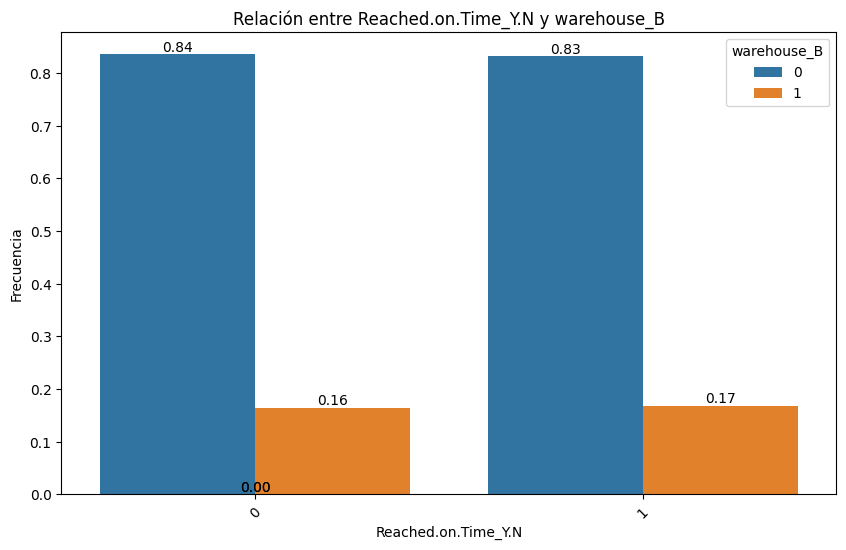

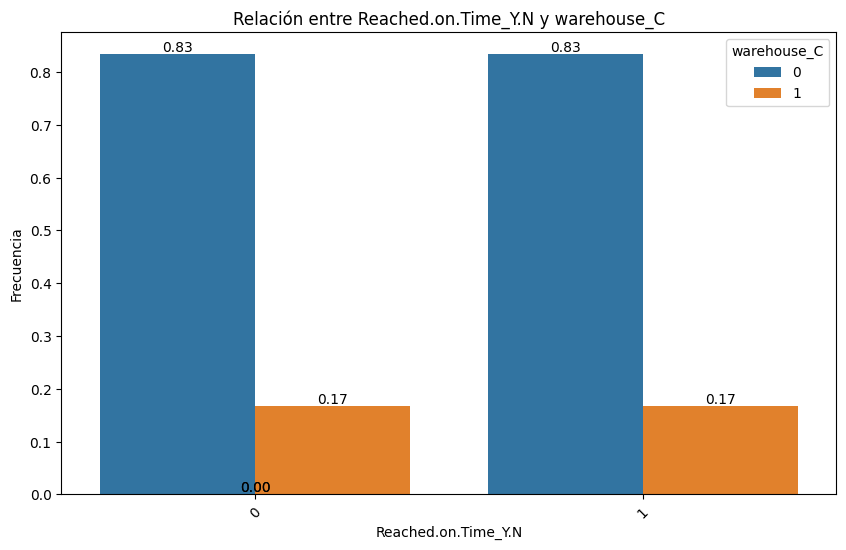

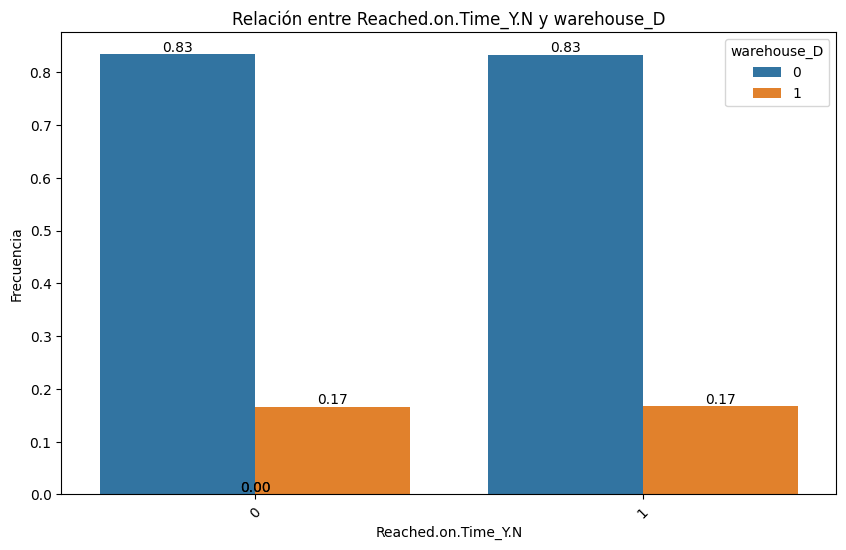

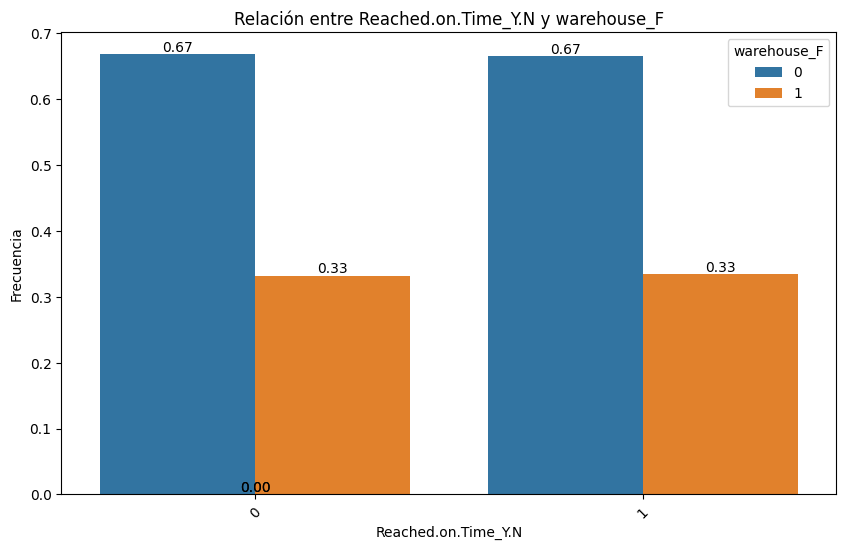

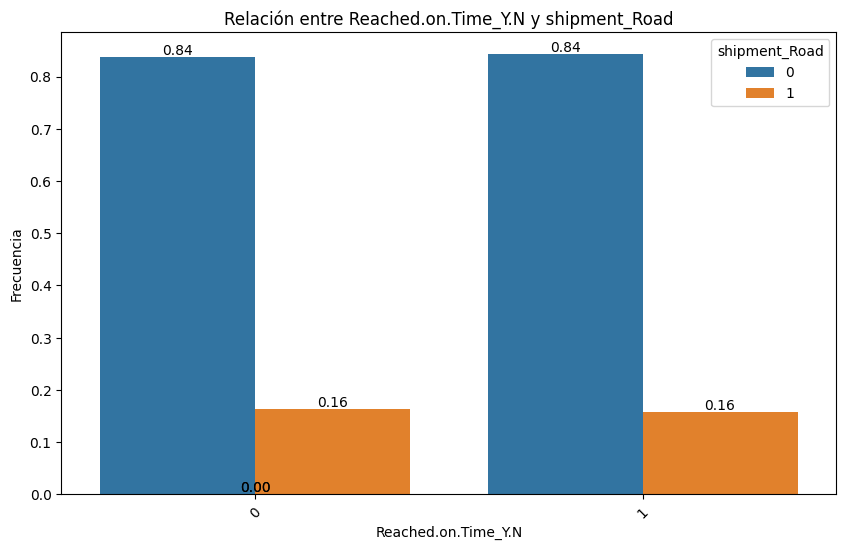

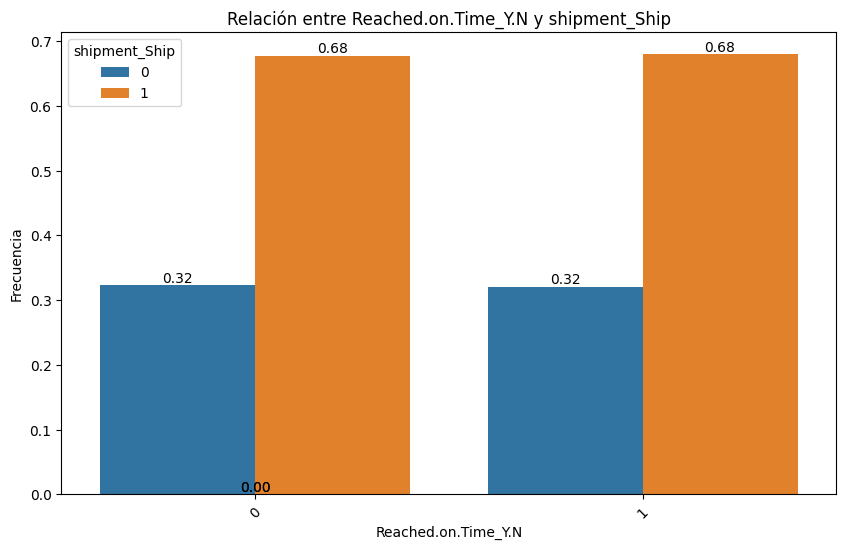

In [825]:
for col in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, col, True, True)

#### Vamos a utilzar la Phik Matrix para ver su correlacion, porque gran parte de las variables predictoras de este proyecto son categóricas. A diferencia de otras métricas como la correlación de Pearson, Phik permite evaluar la relación entre variables categóricas y la variable objetivo, incluso cuando hay desbalance entre clases o relaciones no lineales. Esto nos ayuda a identificar qué variables categóricas tienen mayor asociación con el cumplimiento de las entregas a tiempo."

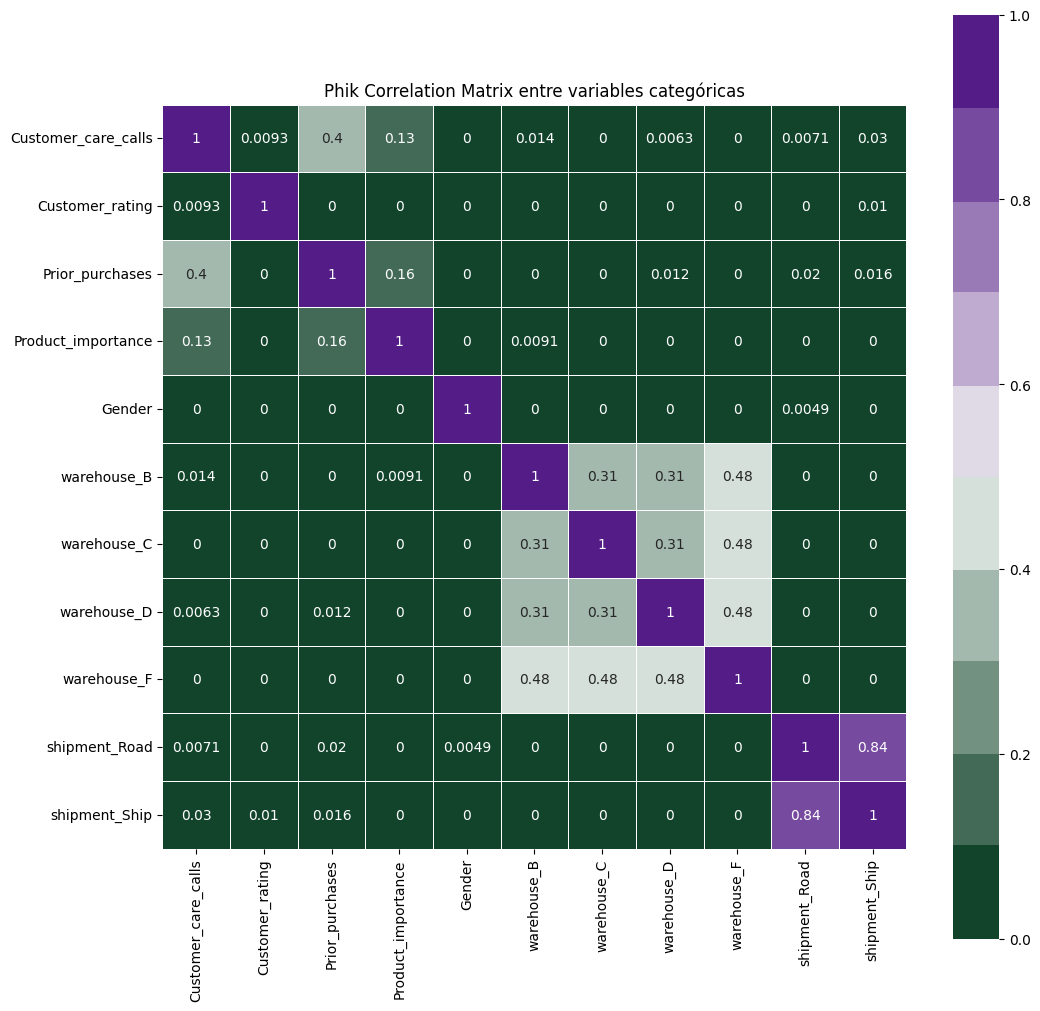

In [826]:
from phik import resources
from phik.report import plot_correlation_matrix

# Primero genera la lista de columnas categóricas correctamente
features_cat = [col for col in train_set.columns if col not in features_num + [target]]

# Ahora calcula la matriz phik solo sobre esas columnas categóricas
phik_matrix = train_set[features_cat].phik_matrix(interval_cols=[])

# Graficar el heatmap
plt.figure(figsize=(12,12))
sns.heatmap(phik_matrix,
            vmin=0, vmax=1, center=0.5,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5)
plt.title("Phik Correlation Matrix entre variables categóricas")
plt.show()

In [827]:
features_first= ['Customer_care_calls','Prior_purchases','Product_importance','warehouse_B','warehouse_C','warehouse_D',
 'warehouse_F','shipment_Road','shipment_Ship']

#### Analizamos las varibles numericas

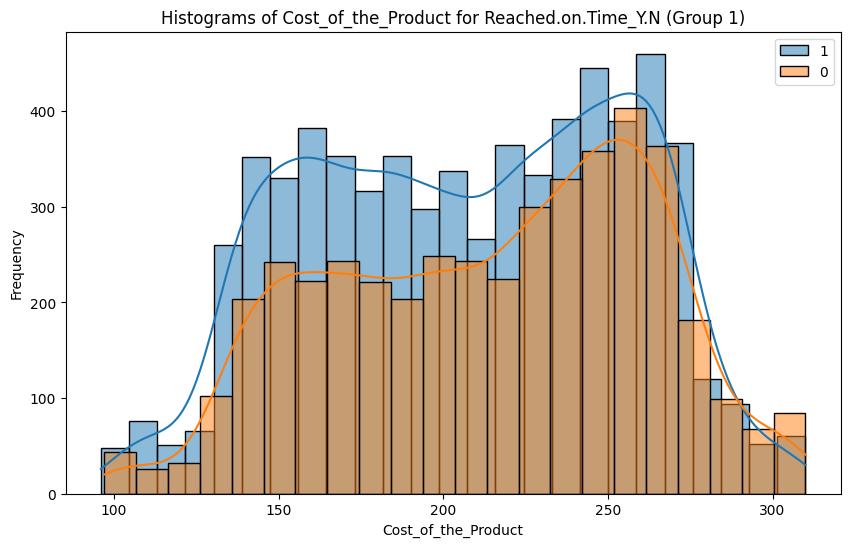

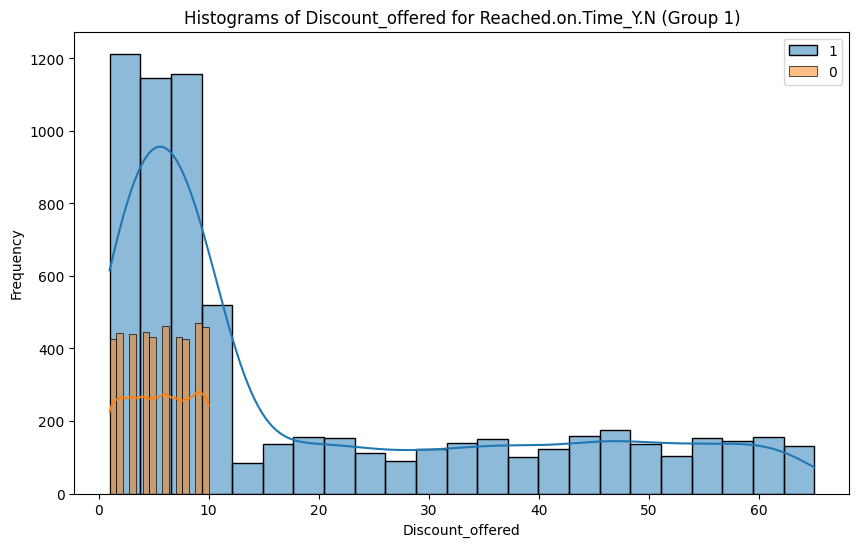

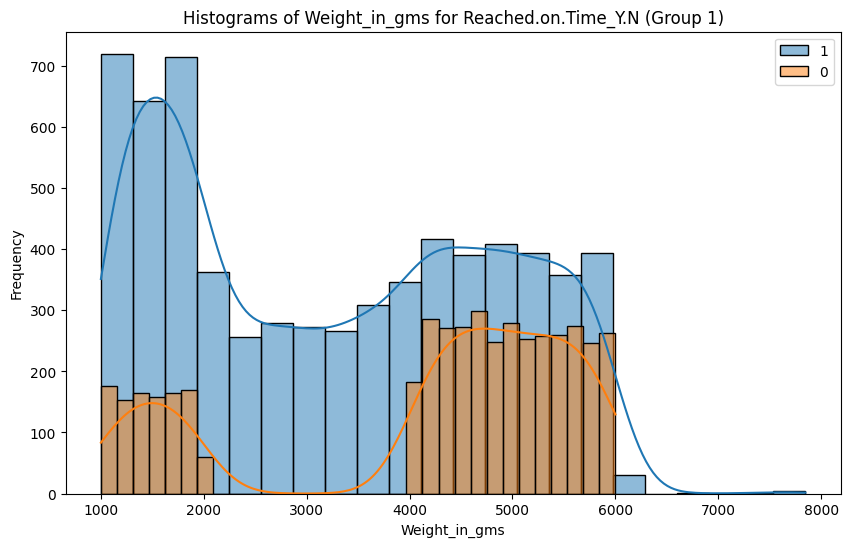

In [828]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

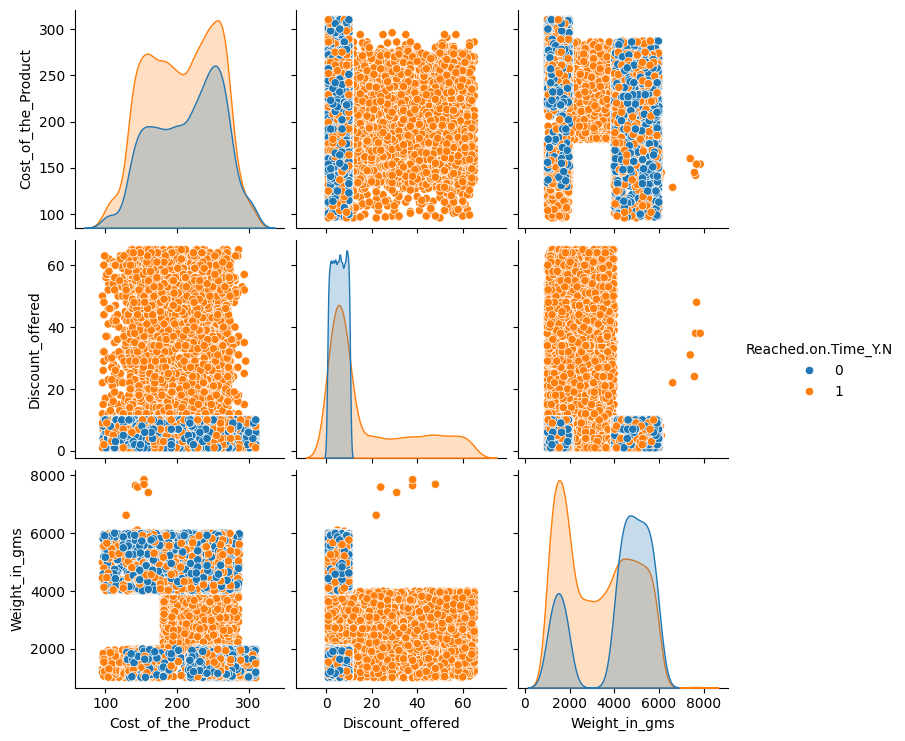

In [829]:
sns.pairplot(train_set[features_num + [target]],
             kind='scatter',
             hue=target)

In [830]:
features_num

['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

In [831]:
features_first.append('Cost_of_the_Product')

In [832]:
features_first.append('Discount_offered')

In [833]:
features_first.append('Weight_in_gms')

In [834]:
features_first

['Customer_care_calls',
 'Prior_purchases',
 'Product_importance',
 'warehouse_B',
 'warehouse_C',
 'warehouse_D',
 'warehouse_F',
 'shipment_Road',
 'shipment_Ship',
 'Cost_of_the_Product',
 'Discount_offered',
 'Weight_in_gms']